# Step 6 NE204 Lab 1
## Creating a Calibration Curve
__Dates: 08/2022 to 10/2022.__

__Group: Megan Schiferl, Chris Lamb, Curtis Berger, Jisu Park__

__Contents:__
This notebook takes in the heights for Cs137, Co-60, Co-57, and Eu-152 using max value method from '4-HeightOptRoutine_Lab1_MS_NE204'. This data is used to construct a calibration curve and return calibrated spectra for each of these isotopes.

    Section 1: Imports
    Section 2: Functions
    Section 3: Find Photopeaks
    Section 4: Create Calibration Curves
    Section 5: Produce Calibrated Spectra
    
__Notes on Running__
Change to your directory that contains the csv files with the heights and you should be able to run all if you use the csv files I uploaded. If you use other isotopes or other csv files, you may have to change the window around where the photopeaks are to get an accurate calibration curve

# Section 1: Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import pandas as pd
from scipy import signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import os
from tqdm import notebook
import matplotlib.colors as mcolors
from decimal import Decimal

# Section 2: Functions

In [2]:
#Define a gaussian function for fitting 
def gauss(x, H, A, x0, sigma):
    # Gaussian signal shape
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#using the gaussian function to fit signals 
def gauss_fit(x, y):
    # Fits gaussian and returns fit parameters
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

# Section 3: Find Photopeaks

In [3]:
# change directory
os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab1\FinalTrapHeights')

In [4]:
#Bring in the heights
fCs137 = pd.read_csv('Cs137_2min_k950m1000_MaxMethod.csv')
fCo60 = pd.read_csv('Co60_2mins_k950m1000_MaxMethod.csv')
fCo57 = pd.read_csv('Co57_2mins_k950m1000_MaxMethod.csv')
fEu152 = pd.read_csv('Eu152_5mins_k950m1000_MaxMethod.csv')

In [5]:
#Change them to arrays for ease of processing
fCs137 = np.array(fCs137)
fCo60 = np.array(fCo60)
fCo57 = np.array(fCo57)
fEu152 = np.array(fEu152)

In [6]:
#Removing any super high energy peaks from consideration
bhCs = []
ghCs = []
for i in range(len(fCs137)):
    if fCs137[i] > 2*np.mean(fCs137):
        bhCs.append(fCs137[i])
    else:
        ghCs.append(fCs137[i])
        
bhCo60 = []
ghCo60 = []
for i in range(len(fCo60)):
    if fCo60[i] > 2*np.mean(fCo60):
        bhCo60.append(fCo60[i])
    else:
        ghCo60.append(fCo60[i])
        
bhCo57 = []
ghCo57 = []
for i in range(len(fCo57)):
    if fCo57[i] > 2*np.mean(fCo57):
        bhCo57.append(fCo57[i])
    else:
        ghCo57.append(fCo57[i])
        
        
bhEu = []
ghEu = []
for i in range(len(fEu152)):
    if fEu152[i] > 3*np.mean(fEu152):
        bhEu.append(fEu152[i])
    else:
        ghEu.append(fEu152[i])

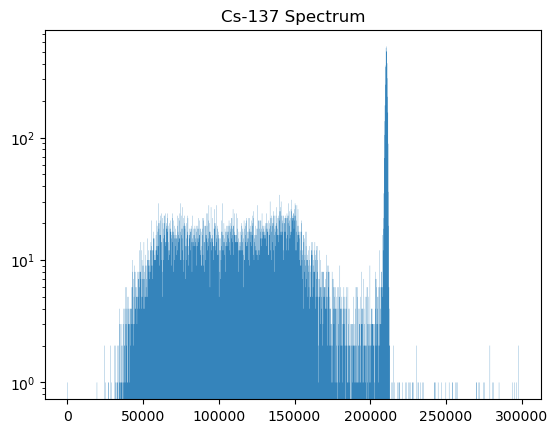

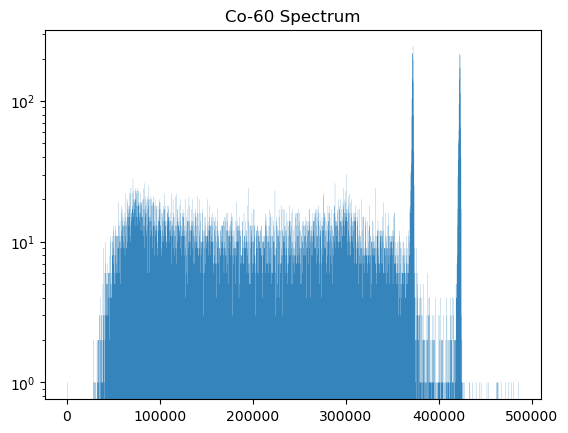

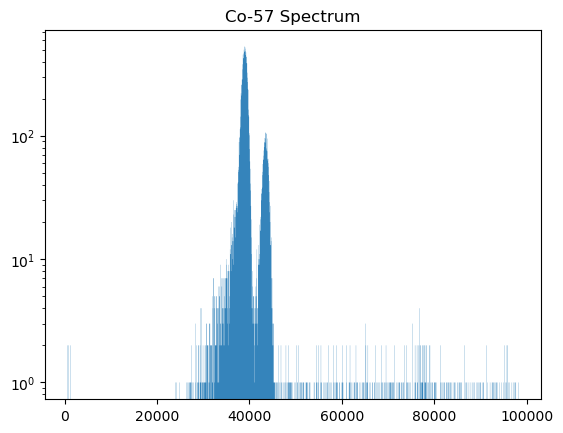

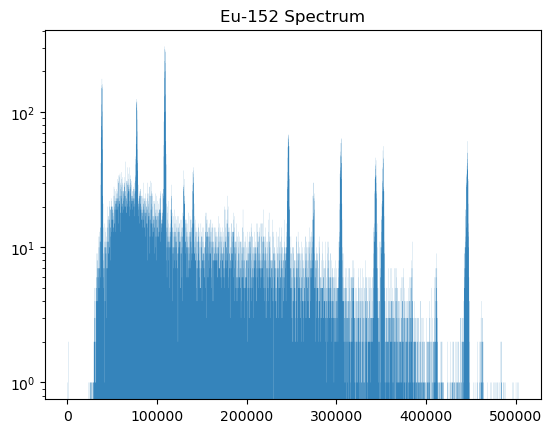

In [7]:
#Plotting the spectra
plt.figure()
# plt.xlim(208000, 213000)
plt.title("Cs-137 Spectrum")
plt.semilogy()
CsSpect, CsBins = np.histogram(ghCs, bins=int(len(fCs137)/10))
plt.hist(CsBins[:-1], CsBins, weights = CsSpect, histtype='stepfilled', alpha = 0.9, 
         label = "Cs-137 Spectrum")

plt.figure()
plt.semilogy()
# plt.xlim(419000,425000)
plt.title("Co-60 Spectrum")
Co60Spect, Co60Bins = np.histogram(ghCo60, bins=int(len(fCo60)/10))
plt.hist(Co60Bins[:-1], Co60Bins, weights = Co60Spect, histtype='stepfilled', alpha = 0.9, 
         label = "C0-60 Spectrum")

plt.figure()
plt.semilogy()
# plt.xlim(41000, 45000)
plt.title("Co-57 Spectrum")
Co57Spect, Co57Bins = np.histogram(ghCo57, bins=int(len(fCo57)/10))
plt.hist(Co57Bins[:-1], Co57Bins, weights = Co57Spect, histtype='stepfilled', alpha = 0.9, 
         label = "C0-57 Spectrum")

plt.figure()
plt.semilogy()
# plt.xlim(440000, 450000)
plt.title("Eu-152 Spectrum")
Eu152Spect, Eu152Bins = np.histogram(ghEu, bins=int(len(fEu152)/10))
plt.hist(Eu152Bins[:-1], Eu152Bins, weights = Eu152Spect, histtype='stepfilled', alpha = 0.9, 
         label = "Eu-152 Spectrum")

plt.show()

# Section 4: Create Calibration Curve

In [8]:
#Finding the peak (channels)
startCs = np.argmin(np.abs(CsBins-208000))
endCs = np.argmin(np.abs(CsBins-213000)) 

CsGauss = gauss_fit(CsBins[startCs:endCs], CsSpect[startCs:endCs])
HCs, ACs, x0Cs, sigmaCs = CsGauss

pemean = [x0Cs]
print(pemean)

[210513.84759043058]


In [9]:
########## ASIDE used for LAB2 ################
# pulsePE = []
# for i in range(len(ghCs)):
#     if fCs137[i] >= 208000 and fCs137[i] <= 213000:
#         pulsePE.append(i)
# # change directory
# os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab2\PulsesPE')

# #Let's just save these heights to a file
# name = "Cs137_2min_k950m1000_PEPulses.csv"
# np.savetxt(name, pulsePE, delimiter=",", header = 0)

In [11]:
#Photopeak energies in keV for calibration
peCs = [661.7]
peCo60 = [1173.228, 1332.492]
peCo57 = [122.06065, 136.4736]
peEu = [121.7817, 244.6974, 344.2785, 778.9045, 964.057, 1085.830, 1112.076, 1408.013]

PEs = peCs + peCo60 + peCo57 + peEu

In [12]:
stCo60 = [360000, 375000]
edCo60 = [419000, 425000]
pemean1 = []

for i in range(2):
    startCo60 = np.argmin(np.abs(Co60Bins-stCo60[i]))
    endCo60 = np.argmin(np.abs(Co60Bins-edCo60[i])) 

    Co60Gauss = gauss_fit(Co60Bins[startCo60:endCo60], Co60Spect[startCo60:endCo60])
    HCo60, ACo60, x0Co60, sigmaCo60 = Co60Gauss
    pemean1.append(x0Co60)

In [13]:
stCo57 = [37000, 41000]
edCo57 = [41000, 45000]
pemean2 = []

for i in range(2):
    startCo57 = np.argmin(np.abs(Co57Bins-stCo57[i]))
    endCo57 = np.argmin(np.abs(Co57Bins-edCo57[i])) 

    Co57Gauss = gauss_fit(Co57Bins[startCo57:endCo57], Co57Spect[startCo57:endCo57])
    HCo57, ACo57, x0Co57, sigmaCo57 = Co57Gauss
    pemean2.append(x0Co57)

In [14]:
stEu = [30000, 75000, 105000, 240000, 302000, 340000, 347500, 440000]
edEu = [40000, 80000, 115000, 250000, 308000, 347500, 355000, 450000]

pemean3 = []

for i in range(8):
    startEu = np.argmin(np.abs(Eu152Bins-stEu[i]))
    endEu = np.argmin(np.abs(Eu152Bins-edEu[i])) 

    EuGauss = gauss_fit(Eu152Bins[startEu:endEu], Eu152Spect[startEu:endEu])
    HEu, AEu, x0Eu, sigmaEu = EuGauss
    pemean3.append(x0Eu)

In [15]:
pemeans = pemean + pemean1 + pemean2 + pemean3

print(pemeans)

[210513.84759043058, 371935.641800975, 422573.3879015406, 38955.591759796494, 43466.67347212191, 38631.8304339929, 77419.85894653665, 108866.75162282381, 246396.995680644, 304946.9753342717, 343599.66396827204, 351855.499288033, 445610.3691637686]


In [16]:
calibPE = np.array([pemeans,PEs])
print(calibPE[0][0])
print(calibPE[1][0])

sort_calibPE = np.sort(calibPE)
print(sort_calibPE)

210513.84759043058
661.7
[[3.86318304e+04 3.89555918e+04 4.34666735e+04 7.74198589e+04
  1.08866752e+05 2.10513848e+05 2.46396996e+05 3.04946975e+05
  3.43599664e+05 3.51855499e+05 3.71935642e+05 4.22573388e+05
  4.45610369e+05]
 [1.21781700e+02 1.22060650e+02 1.36473600e+02 2.44697400e+02
  3.44278500e+02 6.61700000e+02 7.78904500e+02 9.64057000e+02
  1.08583000e+03 1.11207600e+03 1.17322800e+03 1.33249200e+03
  1.40801300e+03]]


In [17]:
#Function for energy calibration
def calibrate_energy(ch, a1, a2, a3, a4, a5, b):
    # Energy calibrate channel number given calibration constants
    return a1*ch + a2*ch**2 + a3*ch**3 + a4*ch**4 + a5*ch**5 + b

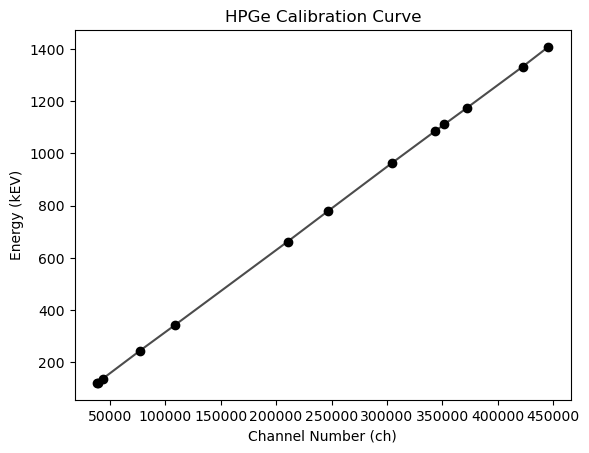

In [18]:
calibparams, pcov = curve_fit(calibrate_energy, xdata=sort_calibPE[0], ydata=sort_calibPE[1])
a1, a2, a3, a4, a5, b = calibparams

plt.scatter(sort_calibPE[0], sort_calibPE[1], c='k')
calib_line = calibrate_energy(sort_calibPE[0], *calibparams)
plt.title("HPGe Calibration Curve")
plt.xlabel("Channel Number (ch)")
plt.ylabel("Energy (kEV)")
plt.plot(sort_calibPE[0], calib_line, c='k', alpha=0.7)

In [19]:
print(calibparams)

[ 3.73617617e-03 -7.53445723e-09  4.01912291e-14 -9.30724976e-20
  7.77945265e-26 -1.41383787e+01]


In [20]:
# change directory
os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab2\PulsesPE')

#Let's just save these heights to a file
name = "CalibrationParameters.csv"
np.savetxt(name, calibparams, delimiter=",", header='0')

In [21]:
N = len(sort_calibPE[1])
MSE = np.sum((calib_line - sort_calibPE[1])**2)
RMSE = np.sqrt(MSE/N)
''' to get this value into a meaningful percentage, we can normalize by the mean value in y_exp'''
rmspe = RMSE/np.mean(sort_calibPE[1]) * 100

In [22]:
print("The root mean square error of this calibration curve is:", RMSE)

The root mean square error of this calibration curve is: 0.6608985984336029


# Section 5: Produce Calibrated Spectra

In [23]:
#Apply the calibration to the height data
calibCs = []
for i in range(len(ghCs)):
    temp = calibrate_energy(ghCs[i], *calibparams)
    calibCs.append(temp)

calibCo60 = []
for i in range(len(ghCo60)):
    temp = calibrate_energy(ghCo60[i], *calibparams)
    calibCo60.append(temp)
    
calibCo57 = []
for i in range(len(ghCo57)):
    temp = calibrate_energy(ghCo57[i], *calibparams)
    calibCo57.append(temp)

calibEu = []
for i in range(len(ghEu)):
    temp = calibrate_energy(ghEu[i], *calibparams)
    calibEu.append(temp)

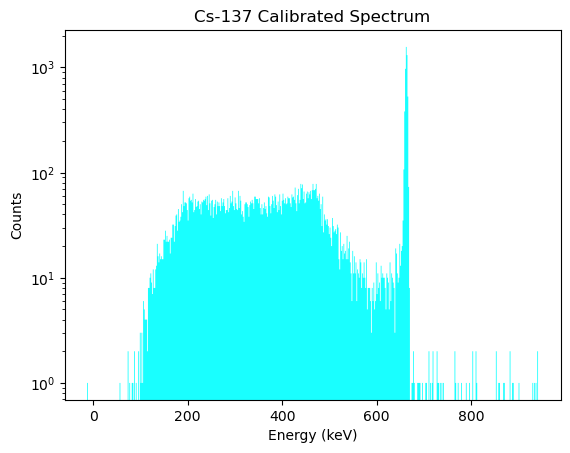

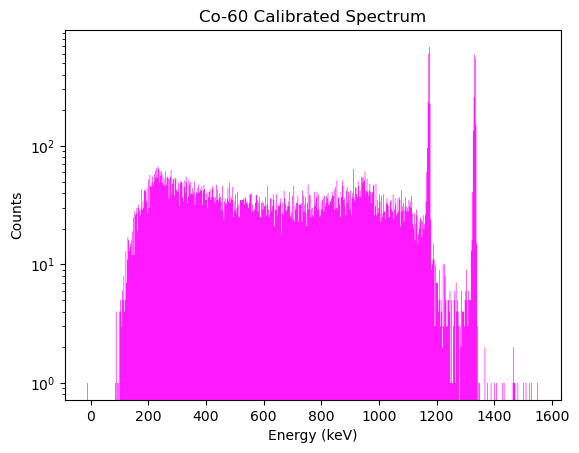

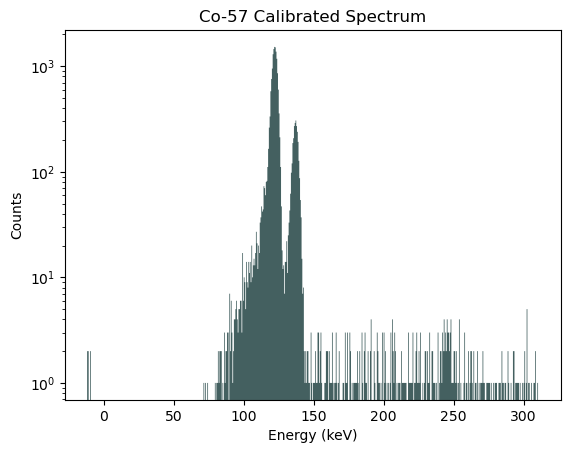

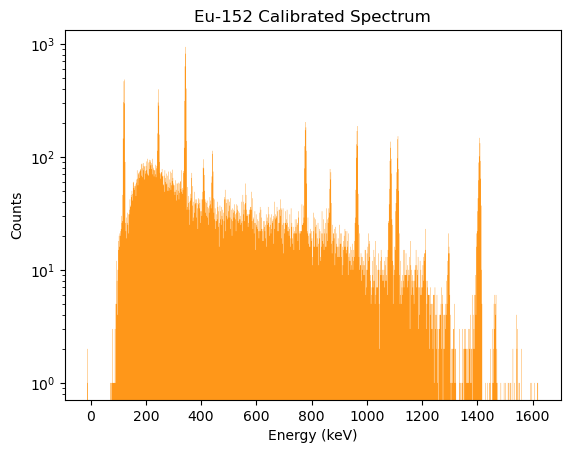

In [24]:
#Plotting the spectra
plt.figure()
plt.title("Cs-137 Calibrated Spectrum")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.semilogy()
calibCsSpect, calibCsBins = np.histogram(calibCs, bins=int(len(calibCs)/30))
Csplot = plt.hist(calibCsBins[:-1], calibCsBins, weights = calibCsSpect, histtype='stepfilled', color='cyan', alpha = 0.9, 
         label = "Cs-137 Spectrum")

plt.figure()
plt.title("Co-60 Calibrated Spectrum")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.semilogy()
calibCo60Spect, calibCo60Bins = np.histogram(calibCo60, bins=int(len(calibCo60)/30))
Co60plot = plt.hist(calibCo60Bins[:-1], calibCo60Bins, weights = calibCo60Spect, histtype='stepfilled', color='fuchsia', alpha = 0.9, 
         label = "Co-60 Spectrum")

plt.figure()
plt.title("Co-57 Calibrated Spectrum")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.semilogy()
calibCo57Spect, calibCo57Bins = np.histogram(calibCo57, bins=int(len(calibCo57)/30))
Co57plot = plt.hist(calibCo57Bins[:-1], calibCo57Bins, weights = calibCo57Spect, histtype='stepfilled', color='darkslategrey', alpha = 0.9, 
         label = "Co-57 Spectrum")

plt.figure()
plt.title("Eu-152 Calibrated Spectrum")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.semilogy()
calibEu152Spect, calibEu152Bins = np.histogram(calibEu, bins=int(len(calibEu)/30))
Euplot = plt.hist(calibEu152Bins[:-1], calibEu152Bins, weights = calibEu152Spect, histtype='stepfilled', color='darkorange',alpha = 0.9, 
         label = "Eu-152 Spectrum")
